In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten, RandomFlip, RandomContrast,RandomZoom,RandomRotation
from keras.applications.vgg16 import VGG16

In [3]:
conv_base = VGG16(
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Data Augmentation

In [11]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.1),
    RandomContrast(0.1),
])

In [19]:
model = Sequential()
model.add (data_augmentation)
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
conv_base.trainable = False

# Load Dataset

In [14]:
test_path = '/kaggle/input/dogs-vs-cats/test'
train_path = '/kaggle/input/dogs-vs-cats/train'

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(150, 150),  # Match VGG16 input shape
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(150, 150),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Normalize the image

In [15]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)  # Convert to float32
    image = image / 255.0              # Scale to [0, 1]
    return image, label                # Return both image and label

In [18]:
# Apply normalization
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

# Fit and compile

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 150ms/step - accuracy: 0.8408 - loss: 2.0710 - val_accuracy: 0.9430 - val_loss: 0.1623
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 106ms/step - accuracy: 0.9063 - loss: 0.2209 - val_accuracy: 0.9520 - val_loss: 0.1359
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.9157 - loss: 0.2094 - val_accuracy: 0.9532 - val_loss: 0.1441
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9129 - loss: 0.2037 - val_accuracy: 0.9528 - val_loss: 0.1318
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.9150 - loss: 0.1981 - val_accuracy: 0.9536 - val_loss: 0.1380
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.9227 - loss: 0.1849 - val_accuracy: 0.9550 - val_loss: 0.1194
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.9215 - loss: 0.1882 - val_accuracy: 0.9528 - val_loss: 0.1329
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.9247 - loss: 0.1

# Plot Graphs

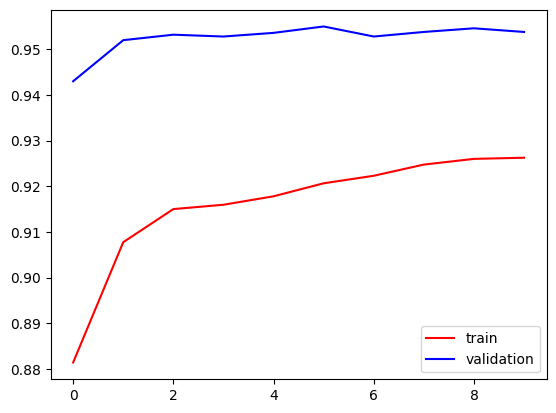

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

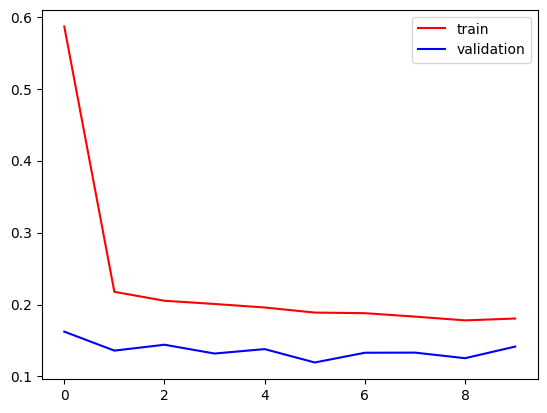

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()